In [1]:
import numpy as np

np.random.seed(0)

In [2]:
A = np.random.uniform(0,1)
B = np.random.uniform(0.8,1.2)
C = np.random.uniform(0,1)
D = np.random.uniform(0.3,0.7)
X0 = np.random.normal(0,0.8)

print("Valor de A = {}\nValor de B = {}\nValor de C = {}\nValor de D = {}\nPosición inicial = {}".format(A,B,C,D,X0))

Valor de A = 0.5488135039273248
Valor de B = 1.0860757465489677
Valor de C = 0.6027633760716439
Valor de D = 0.5179532731987587
Posición inicial = 1.494046392119974


In [3]:
n_samples = 200

V = np.random.normal(0,1,n_samples)
W = np.random.normal(0,1,n_samples)

X = np.zeros(n_samples)
Y = np.zeros(n_samples)
X[0] = X0
for i in range(n_samples):
    try:
        X[i+1] = A*X[i] + B * V[i]
    except IndexError:
        pass
    Y[i] = C*X[i] + D*W[i]

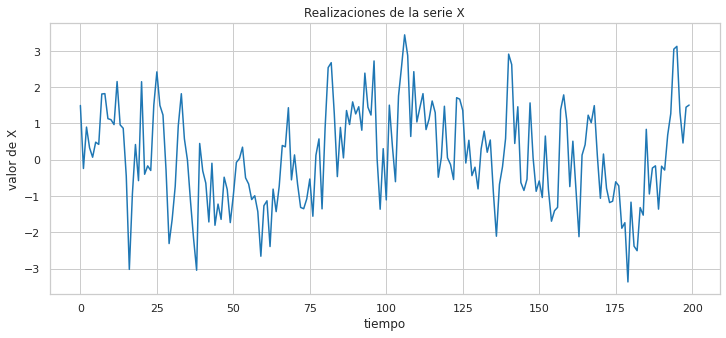

In [4]:
from plot import plot_series

plot_series(X,'X')

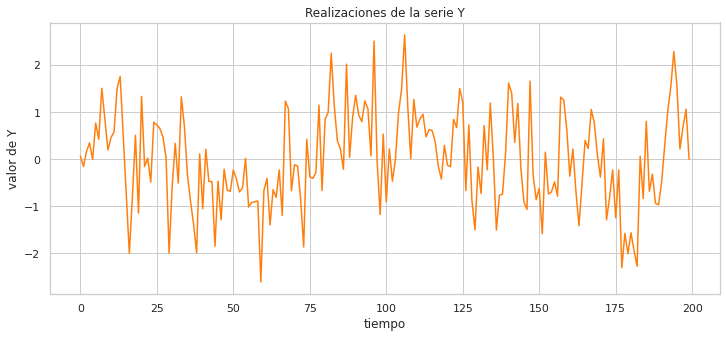

In [5]:
plot_series(Y,'Y','tab:orange')

In [6]:
class KalmanFilter1D:
    def __init__(self,x0,P0,F_model,Q_model,H_model,sigma):
        """Inicializa la clase con listas vacías de observación, predicción y corrección
        
        Argumentos
        ----------
        
            x0: float
                estado inicial
                
            P0: float
                varianza inicial
                
            F_model: float
                factor que multiplica x_{n-1} en x_n

            Q_model: float
                varianza del ruido de la ecuación de estado
                
            H_model: float
                factor que multuplica x_n en y_n

            sigma: float
                varianza del ruido de medición
        
        """
        self._x_observed = [x0]
        # self.x_true = []
        self._x_predicted = []
        self._x_updated = []

        self._variances_predicted = []
        self._variances_updated = [P0]

        self.F = F_model
        self.Q = Q_model
        self.H = H_model
        self.sigma = sigma

        self._K = []

    def predict(self):
        x_pred = self.F * self._x_observed[-1]
        self._x_predicted.append(x_pred)
        P_pred = (self.F**2) * self._variances_updated[-1] + self.Q**2  # o self.Q ???
        self._variances_predicted.append(P_pred)

    def observe(self,x_obs):
        self._x_observed.append(x_obs)

    def kalman_gain(self):
        P = self._variances_predicted[-1]
        self._K.append(P / (P + (self.sigma**2)))

    def update(self):
        y = self._x_observed[-1] - self.H * self._x_predicted[-1]
        self.kalman_gain()
        x_updt = self._x_predicted[-1] + self._K[-1] * y
        self._x_updated.append(x_updt)
        P_updt = (1 - self._K[-1]) * self._variances_predicted[-1]
        self._variances_updated.append(P_updt)

    # getters
    def x_predicted(self):
        return np.array(self._x_predicted)

    def x_updated(self):
        return np.array(self._x_updated)

In [7]:
filter = KalmanFilter1D(Y[0],0.8,A,B,C,D)
# chequear lo de la varianzaaaaaaaa

In [8]:
filter.predict()

In [9]:
filter.x_predicted()

array([0.03460202])

In [10]:
filter.observe(Y[1])
filter._x_observed

[0.06304877155258082, -0.1581339794923657]

In [11]:
filter.update()
filter.x_updated()

array([-0.11595496])

In [12]:
for i in range(2,n_samples):
    # predicción
    filter.predict()
    # observación
    filter.observe(Y[i])
    # actualizacion
    filter.update()

In [13]:
X_pred = filter.x_predicted()
X_pred.shape

(199,)

In [14]:
X.shape

(200,)

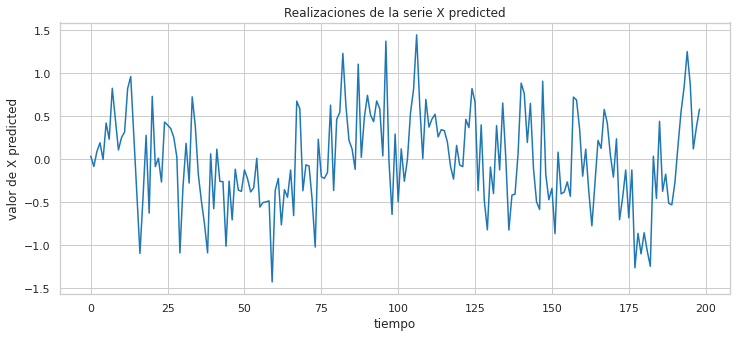

In [15]:
plot_series(X_pred,'X predicted')

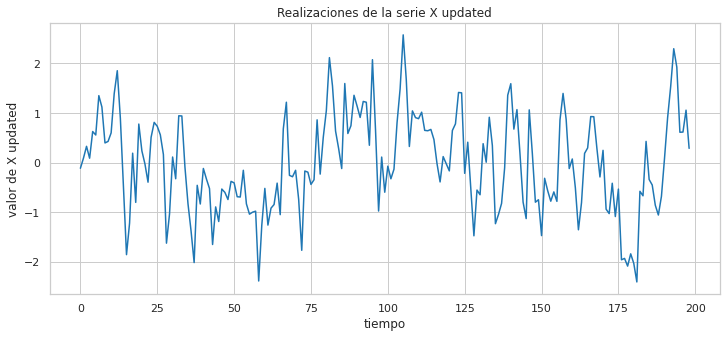

In [16]:
X_updt = filter.x_updated()
plot_series(X_updt,'X updated')

In [17]:
X_updt.shape

(199,)

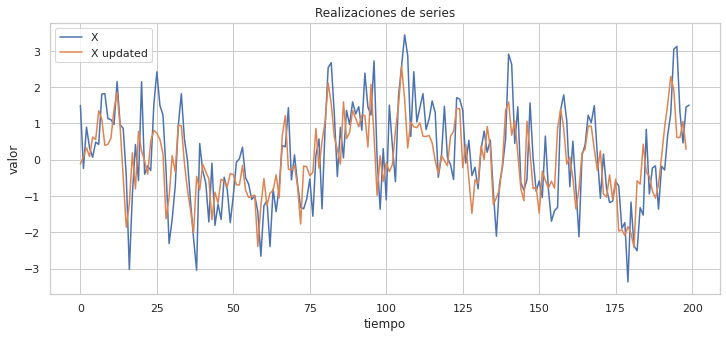

In [18]:
plot_series([X,X_updt],['X','X updated'])

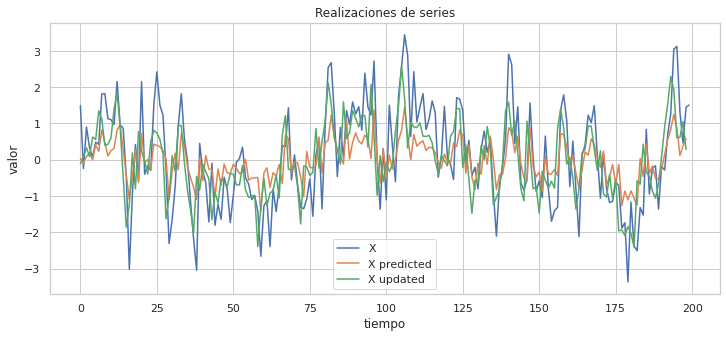

In [19]:
plot_series([X,X_pred,X_updt],['X','X predicted','X updated'])